***Добрый день, данная работ принадлежит студенту Яндекс Практикума - Максимовой Анне Дмитриевне, телеграмм аккаунт для связи [Telegram @skorpioshka64](https://t.me/skorpioshka64)***

##### Проект выполнялся в среде `Python` версии `3.12.4`

In [2]:
import os

import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats


In [3]:
def preprocessing(df):
    print("Изучение данных датафрейма")
    print("Вывод первых 5 строк \n")
    display(df.head(5))
    print("-" * 100)
    print(f"Размерность датафрейма, составляет - {(df.shape)}")
    print("-" * 100)
    print("Общая информация:\n")
    display(df.info())
    print("-" * 100)
    print("Описательная статистика:\n")
    display(df.describe())
    print("-" * 100)
    df.isna().sum()
    print("Проверка на наличие явных дубликатов:\n")
    display(df.duplicated().sum())
    print("-" * 100)
    print("Вывод количества уникальных значений")
    display(pd.DataFrame(df.apply(lambda x: x.nunique())))

In [6]:
def optimize_memory_usage(df: pd.DataFrame, print_size: bool = True) -> pd.DataFrame:
    """
    Function optimizes memory usage in dataframe
    print_size: bool - display of optimization results
    return pd.DataFrame - amount of optimized memory
    """

    # Типы, которые будем проверять на оптимизацию
    numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]

    # Размер занимаемой памяти до оптимизации (в Мб)
    before_size = df.memory_usage().sum() / 1024**2
    for column in df.columns:
        column_type = df[column].dtypes
        if column_type in numerics:
            column_min = df[column].min()
            column_max = df[column].max()
            if str(column_type).startswith("int"):
                if (
                    column_min > np.iinfo(np.int8).min
                    and column_max < np.iinfo(np.int8).max
                ):
                    df[column] = df[column].astype(np.int8)
                elif (
                    column_min > np.iinfo(np.int16).min
                    and column_max < np.iinfo(np.int16).max
                ):
                    df[column] = df[column].astype(np.int16)
                elif (
                    column_min > np.iinfo(np.int32).min
                    and column_max < np.iinfo(np.int32).max
                ):
                    df[column] = df[column].astype(np.int32)
                elif (
                    column_min > np.iinfo(np.int64).min
                    and column_max < np.iinfo(np.int64).max
                ):
                    df[column] = df[column].astype(np.int64)
            else:
                if (
                    column_min > np.finfo(np.float32).min
                    and column_max < np.finfo(np.float32).max
                ):
                    df[column] = df[column].astype(np.float32)
                else:
                    df[column] = df[column].astype(np.float64)

    # Размер занимаемой памяти после оптимизации (в Мб)
    after_size = df.memory_usage().sum() / 1024**2
    if print_size:
        print(
            "Размер использования памяти: до {:5.2f} Mb - после {:5.2f} Mb ({:.1%})".format(
                before_size, after_size, (before_size - after_size) / before_size
            )
        )

    return df

In [16]:
def plot_qq_grids(
    df, rows=8, cols=9, figsize=(27, 24), title="Q-Q графики для всех столбцов"
):
    """
    Создает сетку Q-Q графиков для всех числовых столбцов в DataFrame.

    Parameters:
    df (pd.DataFrame): DataFrame с данными.
    rows (int): Количество строк в сетке графиков.
    cols (int): Количество столбцов в сетке графиков.
    figsize (tuple): Размер фигуры.
    title (str): Заголовок для всей фигуры.
    """
    # Создание фигуры и осей
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    fig.suptitle(title, fontsize=16)

    # Выбор только числовых столбцов
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    # Итерация по столбцам и построение Q-Q графиков
    for i, col in enumerate(numeric_columns):
        row = i // cols
        col_pos = i % cols
        ax = axes[row, col_pos]
        stats.probplot(df[col], dist="norm", plot=ax)
        ax.set_title(col, fontsize=10)
        ax.set_xlabel("")
        ax.set_ylabel("")

    # Удаление пустых графиков, если количество столбцов не кратно числу графиков в строке
    for j in range(len(numeric_columns), rows * cols):
        fig.delaxes(axes.flatten()[j])

    plt.tight_layout(
        rect=[0, 0, 1, 0.96]
    )  # Подгонка макета и оставление места для основного заголовка
    plt.show()


In [5]:
# Пути к файлам
pth1 = "./datasets/base.csv"
pth2 = "./datasets/train.csv"
pth3 = "./datasets/validation.csv"
pth4 = "./datasets/validation_answer.csv"


# Функция для загрузки файлов
def load_csv(filepath):
    if os.path.exists(filepath):
        return pd.read_csv(filepath)
    else:
        print(f"File not found: {filepath}")
        return None


# Загрузка данных
df_base = load_csv(pth1)
df_train = load_csv(pth2)
df_validation = load_csv(pth3)
df_validation_answer = load_csv(pth4)


In [7]:
# стандартизация названий колонок, смена индексации и оптимизации объёма данных
for df in [df_base, df_train, df_validation, df_validation_answer]:
    df.columns = df.columns.str.lower()
    df.set_index("id", inplace=True)
    df = optimize_memory_usage(df)
del df

Размер использования памяти: до 162.52 Mb - после 82.38 Mb (49.3%)
Размер использования памяти: до  5.65 Mb - после  2.90 Mb (48.6%)
Размер использования памяти: до  5.57 Mb - после  2.82 Mb (49.3%)
Размер использования памяти: до  0.15 Mb - после  0.15 Mb (0.0%)


In [13]:
preprocessing(df_base)

Изучение данных датафрейма
Вывод первых 5 строк 



,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
id,,,,,,,,,,,,,,,,,,,,,
4207931-base,-43.946243,15.364378,17.515854,-132.311462,157.064423,-4.069252,-340.630859,-57.550140,128.398224,45.090958,...,-71.927170,30.711966,-90.190475,-24.931271,66.972534,106.346634,-44.270622,155.988342,-1074.464844,-25.066608
2710972-base,-73.004890,4.923342,-19.750746,-136.529083,99.907173,-70.709106,-567.401978,-128.890152,109.914986,201.472198,...,-109.044662,20.916021,-171.201385,-110.596848,67.730103,8.909615,-9.470253,133.295364,-545.897034,-72.913231
1371460-base,-85.565567,-0.493598,-48.374817,-157.985016,96.809509,-81.710213,-22.297688,79.768669,124.357086,105.715179,...,-58.821651,41.369606,-132.934494,-43.016838,67.871925,141.778244,69.048523,111.720383,-1111.038818,-23.087206
3438601-base,-105.564087,15.393871,-46.223934,-158.114883,79.514114,-48.944481,-93.713013,38.581398,123.397957,110.324326,...,-87.907288,-58.806870,-147.794800,-155.830231,68.974754,21.397511,126.098785,139.733200,-1282.707275,-74.527939
422798-base,-74.638878,11.315012,-40.204174,-161.764297,50.507114,-80.775558,-640.923462,65.224998,122.344940,191.465851,...,-30.002094,53.642929,-149.823227,176.921371,69.473282,-43.395180,-58.947716,133.840637,-1074.464844,-1.164146


----------------------------------------------------------------------------------------------------
Размерность датафрейма, составляет - (291813, 72)
----------------------------------------------------------------------------------------------------
Общая информация:

<class 'pandas.core.frame.DataFrame'>
Index: 291813 entries, 4207931-base to 274130-base
Data columns (total 72 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       291813 non-null  float32
 1   1       291813 non-null  float32
 2   2       291813 non-null  float32
 3   3       291813 non-null  float32
 4   4       291813 non-null  float32
 5   5       291813 non-null  float32
 6   6       291813 non-null  float32
 7   7       291813 non-null  float32
 8   8       291813 non-null  float32
 9   9       291813 non-null  float32
 10  10      291813 non-null  float32
 11  11      291813 non-null  float32
 12  12      291813 non-null  float32
 13  13      291813 non-null  float32

None

----------------------------------------------------------------------------------------------------
Описательная статистика:



,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
count,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,...,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000
mean,-86.274734,8.078087,-44.613483,-146.605530,111.261185,-71.875023,-393.430481,20.391975,123.676727,124.427147,...,-79.075195,33.244843,-154.720276,13.699276,67.792664,23.543148,74.890038,115.611366,-798.355225,-47.701336
std,24.918947,4.949495,38.545929,19.842726,46.350082,28.189743,272.084930,64.297195,6.352832,64.366631,...,30.485073,28.896143,41.217567,98.996414,1.825081,55.353031,61.320347,21.219221,385.414337,41.731026
min,-189.356018,-12.594500,-231.785919,-224.880493,-95.240829,-188.473328,-791.468750,-296.171051,93.684616,-143.499603,...,-214.821136,-85.825500,-346.239319,-157.593872,59.835789,-213.492416,-190.483154,18.601448,-1297.924927,-209.935760
25%,-103.154297,4.709408,-69.535896,-159.882736,80.367638,-91.227936,-631.937866,-22.085905,119.473625,81.685608,...,-98.823830,16.952824,-180.695557,-71.763962,66.582787,-12.501141,33.784821,101.675659,-1074.464844,-75.621109
50%,-86.308128,8.040010,-43.838493,-146.717361,111.776871,-71.751823,-424.306915,20.850153,123.882500,123.456268,...,-78.538177,34.682541,-153.902832,13.167371,67.815048,23.461630,74.876984,116.049271,-1074.464844,-48.403816
75%,-69.254616,11.466815,-19.694052,-133.320145,142.364609,-52.310825,-157.342697,63.989326,127.967766,167.014130,...,-58.638412,52.097710,-127.221359,99.362213,69.028801,59.740337,115.896881,129.625946,-504.291168,-19.684170
max,15.574615,28.751917,151.377075,-55.167892,299.307922,49.880882,109.631989,301.094238,147.870911,402.994598,...,48.822197,141.025269,17.344528,185.096725,75.474625,264.347198,319.601044,213.577255,98.770813,126.973221


----------------------------------------------------------------------------------------------------
Проверка на наличие явных дубликатов:



11278

----------------------------------------------------------------------------------------------------
Вывод количества уникальных значений


,0
0,256118
1,257296
2,257709
3,252056
4,256764
...,...
67,257894
68,257492
69,254869
70,160803


Проверим данные на нормальность с помощью графиков

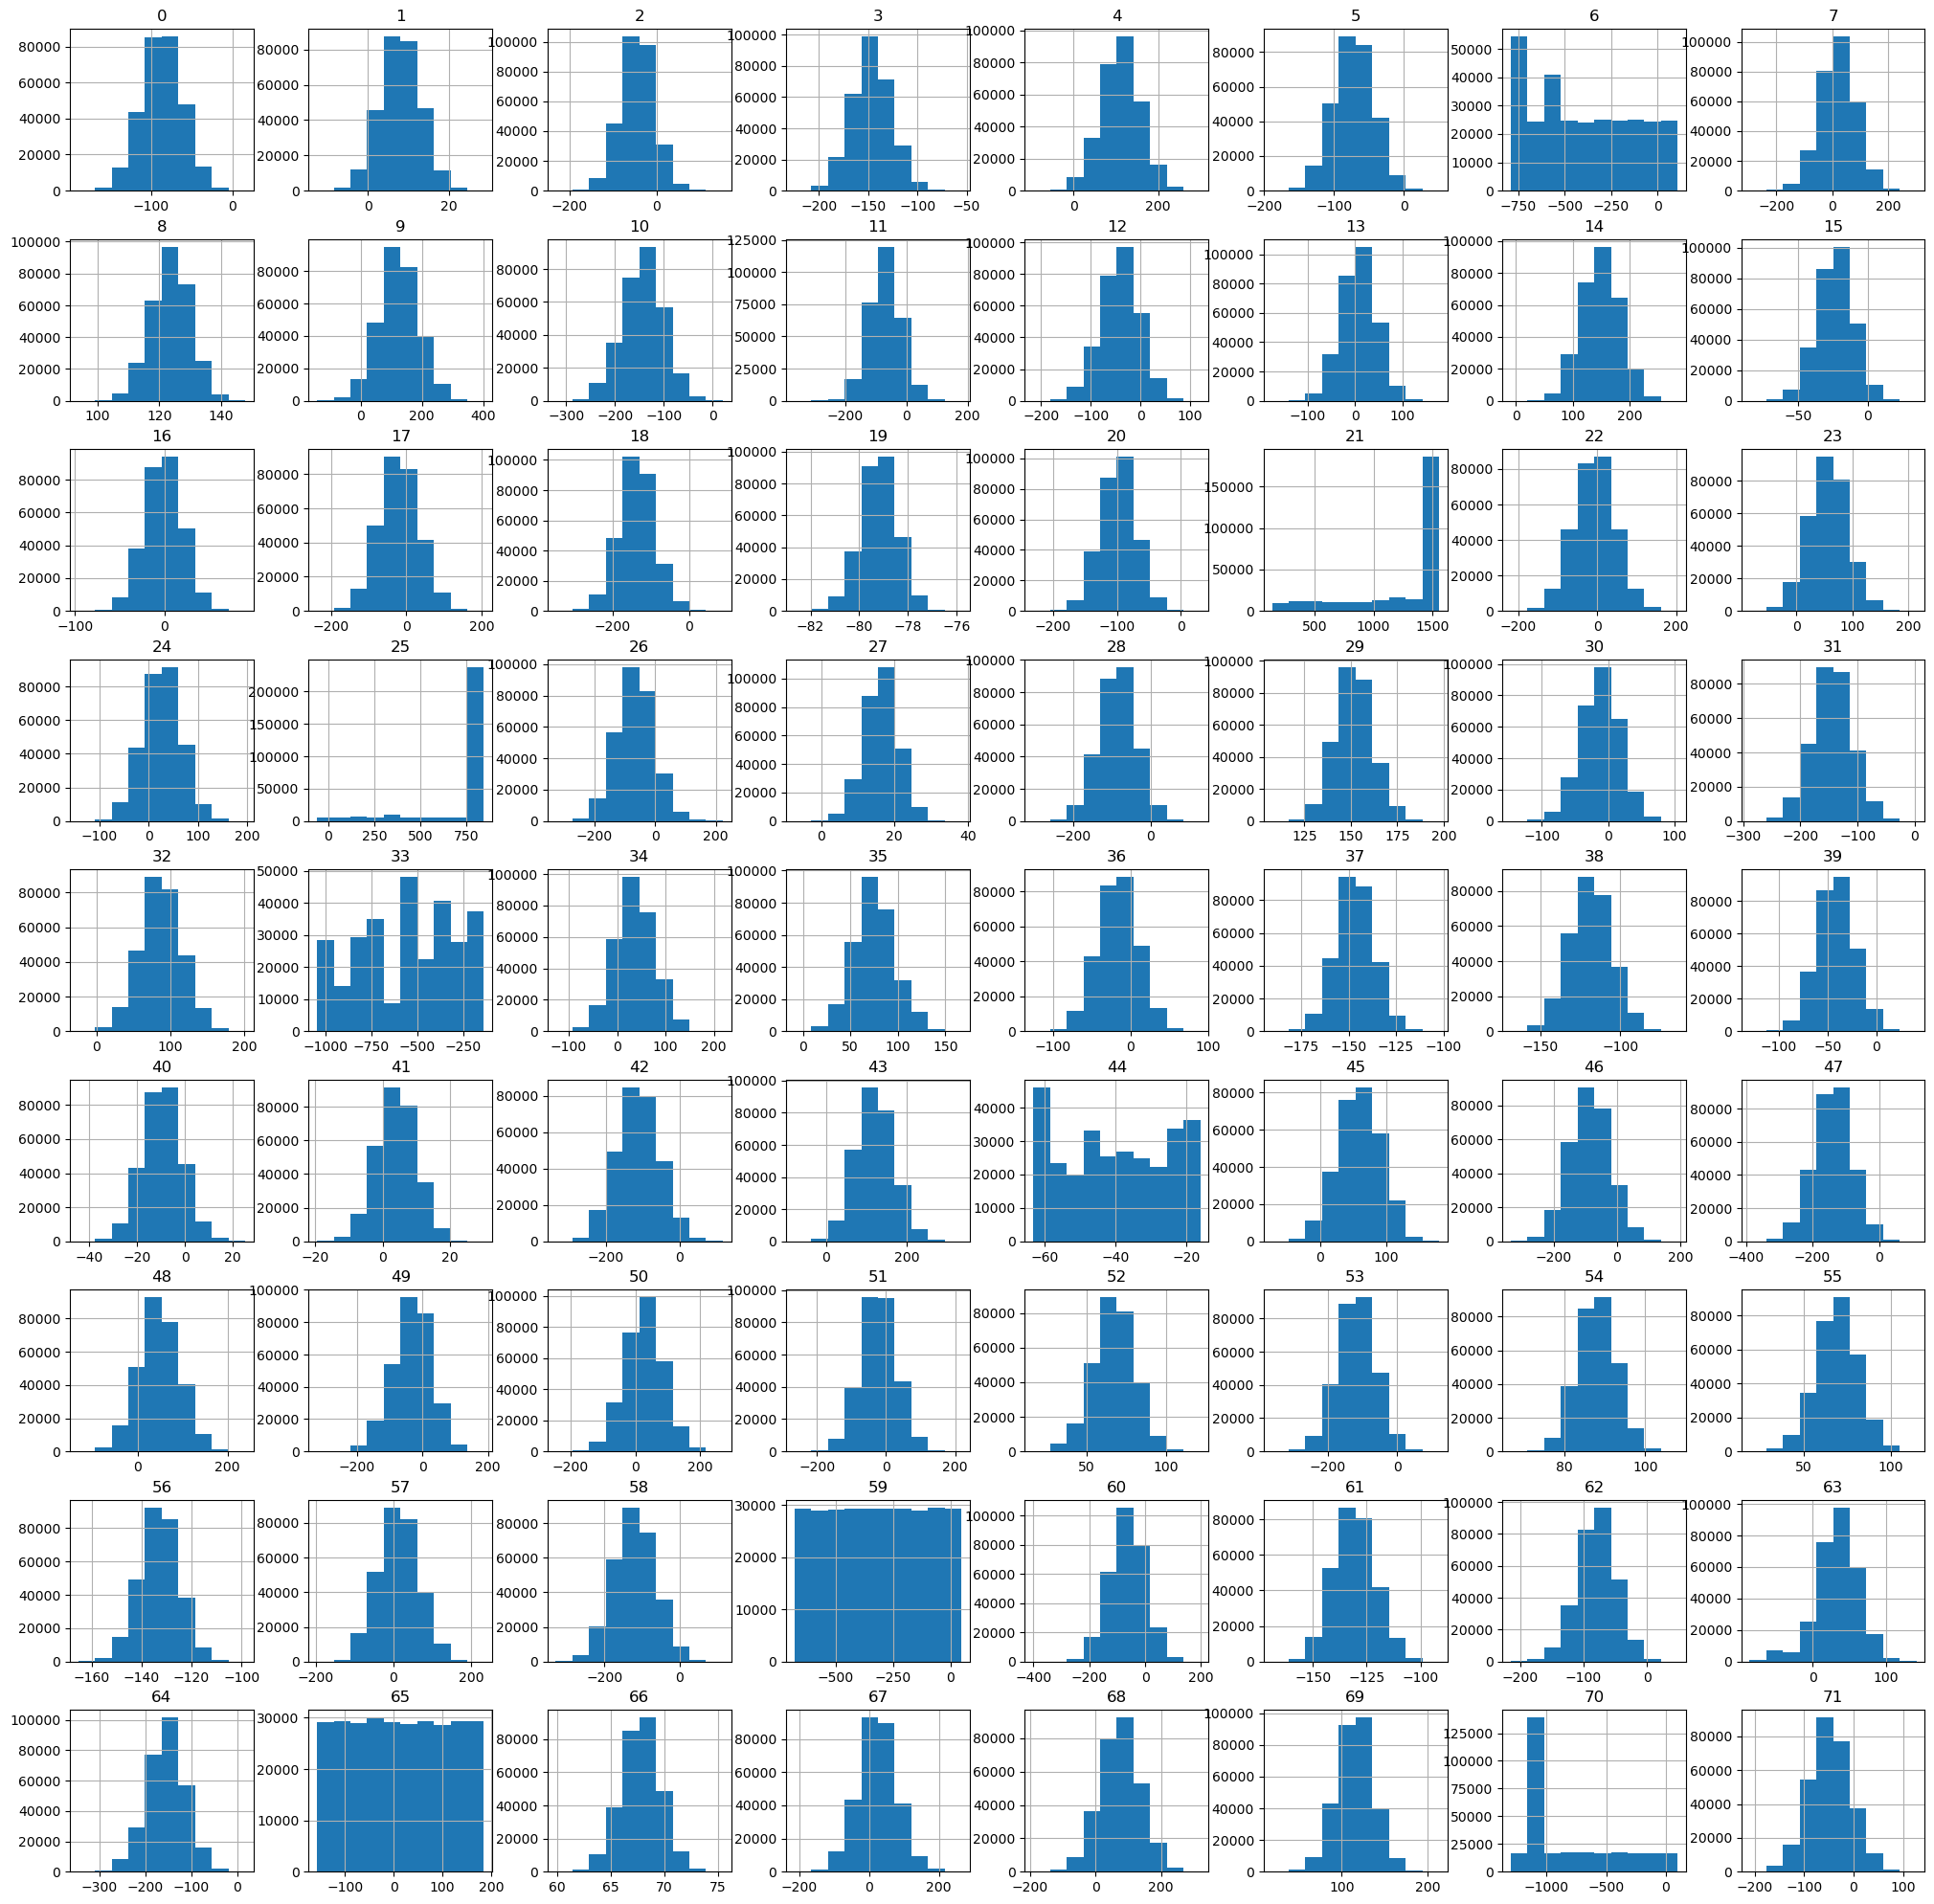

In [9]:
df_base.hist(figsize=(25, 25));

Q-Q график (квантиль-квантиль график): 
Показывает, насколько данные совпадают с нормальным распределением, сравнивая квантиль данных с квантилями нормального распределения.
В Q-Q графике точки должны быть близки к прямой линии, если данные нормально распределены.

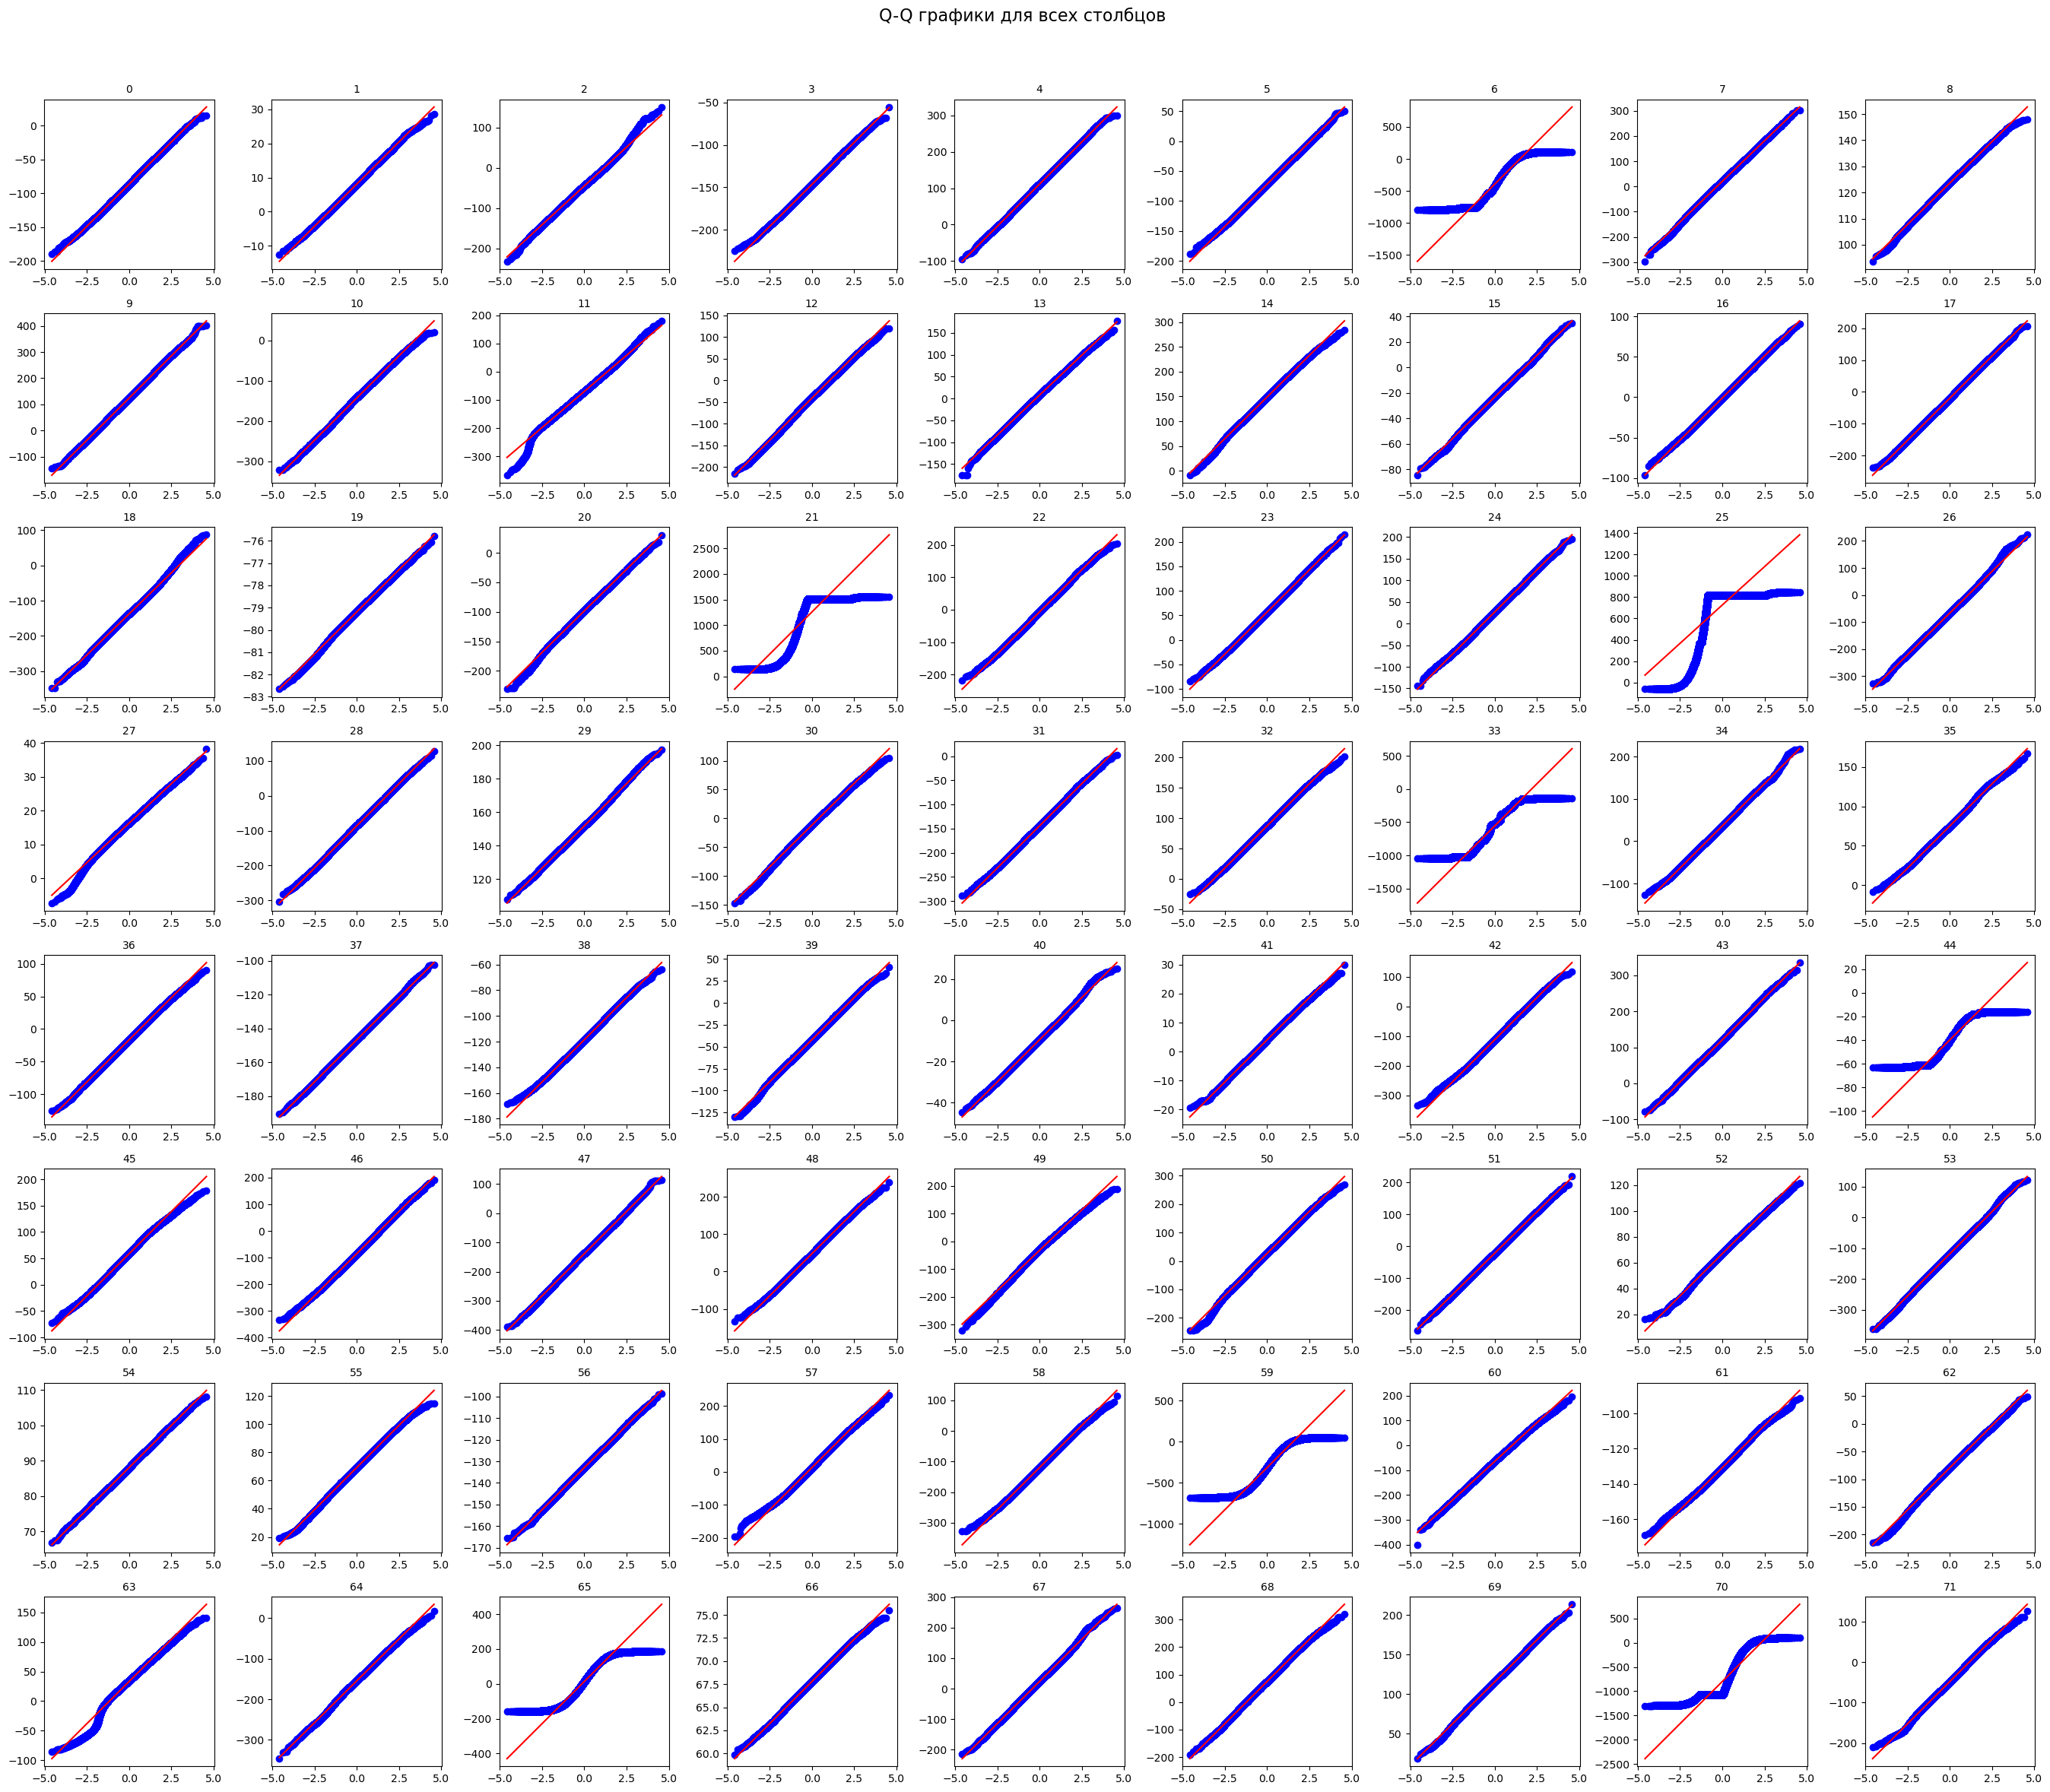

In [17]:
plot_qq_grids(df_base)


**Вывод**  
В результате анализа датасета с 72 колонками и 291813 строками были получены следующие ключевые моменты:

- Дубликаты: Обнаружено 11278 дубликатов. Рекомендуется провести их удаление для повышения качества анализа и моделирования.
- Пропуски: Пропуски отсутствуют, что позволяет использовать все доступные данные для дальнейшего анализа.
- Типы данных: Все значения числовые и успешно приведены к формату float32, что оптимизирует использование памяти.
- Названия признаков: Признаки без имен, пронумерованные по порядку. Вероятно, данные закодированы, что следует учитывать при интерпретации результатов.
- Стандартизация: Разнообразие диапазонов значений признаков требует стандартизации для улучшения производительности моделей.
- Распределение значений: Большинство признаков имеют распределение, близкое к нормальному. Однако признаки с номерами 6, 21, 25, 33, 44, 59, 65 и 70 имеют отклонения. Рекомендуется рассмотреть возможность их удаления, поскольку недостаток понимания их значимости может усложнить процесс моделирования.

In [14]:
preprocessing(df_train)

Изучение данных датафрейма
Вывод первых 5 строк 



,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,target
id,,,,,,,,,,,,,,,,,,,,,
109249-query,-24.021454,3.122524,-80.947525,-112.329994,191.090179,-66.903130,-759.626038,-75.284454,120.551491,131.131699,...,-24.601669,-167.760773,133.678513,68.184601,26.317545,11.938202,148.549316,-778.563354,-46.877750,66971-base
34137-query,-82.033577,8.115866,-8.793022,-182.972107,56.645336,-52.597610,-55.720337,130.059250,129.383347,76.202881,...,54.448433,-120.894806,-12.292085,66.608116,-27.997612,10.091335,95.809265,-1022.691528,-88.564705,1433819-base
136121-query,-75.719643,-0.223386,-86.186127,-162.064056,114.320114,-53.394600,-117.261017,-24.857851,124.807800,112.190155,...,-5.609123,-93.029877,-80.997871,63.733383,11.378683,62.932007,130.975388,-1074.464844,-74.861176,290133-base
105191-query,-56.580620,5.093593,-46.943111,-149.039124,112.436432,-76.820511,-324.995636,-32.833107,119.478653,120.074791,...,21.624313,-158.880371,179.597290,69.891357,-33.804955,233.914612,122.868546,-1074.464844,-93.775375,1270048-base
63983-query,-52.725651,9.027046,-92.829651,-113.111008,134.124969,-42.423073,-759.626038,8.261168,119.490227,172.365356,...,13.807772,-208.650040,41.742016,66.522423,41.362930,162.723053,111.261307,-151.162811,-33.831451,168591-base


----------------------------------------------------------------------------------------------------
Размерность датафрейма, составляет - (9999, 73)
----------------------------------------------------------------------------------------------------
Общая информация:

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 109249-query to 13504-query
Data columns (total 73 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       9999 non-null   float32
 1   1       9999 non-null   float32
 2   2       9999 non-null   float32
 3   3       9999 non-null   float32
 4   4       9999 non-null   float32
 5   5       9999 non-null   float32
 6   6       9999 non-null   float32
 7   7       9999 non-null   float32
 8   8       9999 non-null   float32
 9   9       9999 non-null   float32
 10  10      9999 non-null   float32
 11  11      9999 non-null   float32
 12  12      9999 non-null   float32
 13  13      9999 non-null   float32
 14  14      9999 n

None

----------------------------------------------------------------------------------------------------
Описательная статистика:



,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,...,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,-85.469574,7.608016,-43.886494,-146.204147,111.979584,-73.679420,-443.890747,21.820551,123.107399,126.418045,...,-81.373940,37.137379,-152.473801,16.533798,67.803513,23.750004,73.254974,115.410515,-708.824829,-48.325314
std,25.986217,4.985728,39.318615,20.309633,47.599873,28.743811,281.494324,66.450439,6.418815,64.858192,...,30.628553,25.391546,41.109707,98.956200,1.875664,54.838215,61.459194,21.641422,405.686493,40.899658
min,-173.032562,-11.560507,-187.292633,-219.724792,-71.243347,-184.962448,-791.443909,-250.681335,99.001770,-113.104599,...,-191.308228,-60.515068,-306.837646,-157.579208,61.339855,-165.361252,-127.017555,34.696030,-1297.871948,-208.276810
25%,-103.445763,4.178606,-69.990780,-160.032883,79.712387,-93.620304,-757.628754,-21.344349,118.787720,81.959694,...,-101.775513,20.369431,-179.337379,-67.498386,66.534668,-12.360923,32.034006,100.510067,-1074.464844,-75.271168
50%,-85.177101,7.592032,-43.009907,-146.576218,112.233475,-74.031082,-517.673340,22.233669,123.002785,126.280350,...,-81.767227,36.944336,-151.394592,16.007952,67.819710,24.146404,73.178337,115.813057,-800.296692,-49.027412
75%,-67.437847,10.989735,-17.223701,-132.675850,144.052643,-54.168715,-203.437622,66.437386,127.499310,169.959885,...,-60.619156,53.901958,-124.285236,101.773979,69.086704,59.301756,113.039341,130.225601,-362.486816,-21.845187
max,5.052292,26.741890,134.859802,-71.194679,297.368622,31.378914,109.632034,261.413422,145.178467,353.214966,...,20.978668,137.559204,-18.955208,185.055847,74.121605,236.385468,304.391785,187.621399,97.787796,111.831955


----------------------------------------------------------------------------------------------------
Проверка на наличие явных дубликатов:



243

----------------------------------------------------------------------------------------------------
Вывод количества уникальных значений


,0
0,9688
1,9690
2,9689
3,9677
4,9690
...,...
68,9690
69,9687
70,7488
71,9690


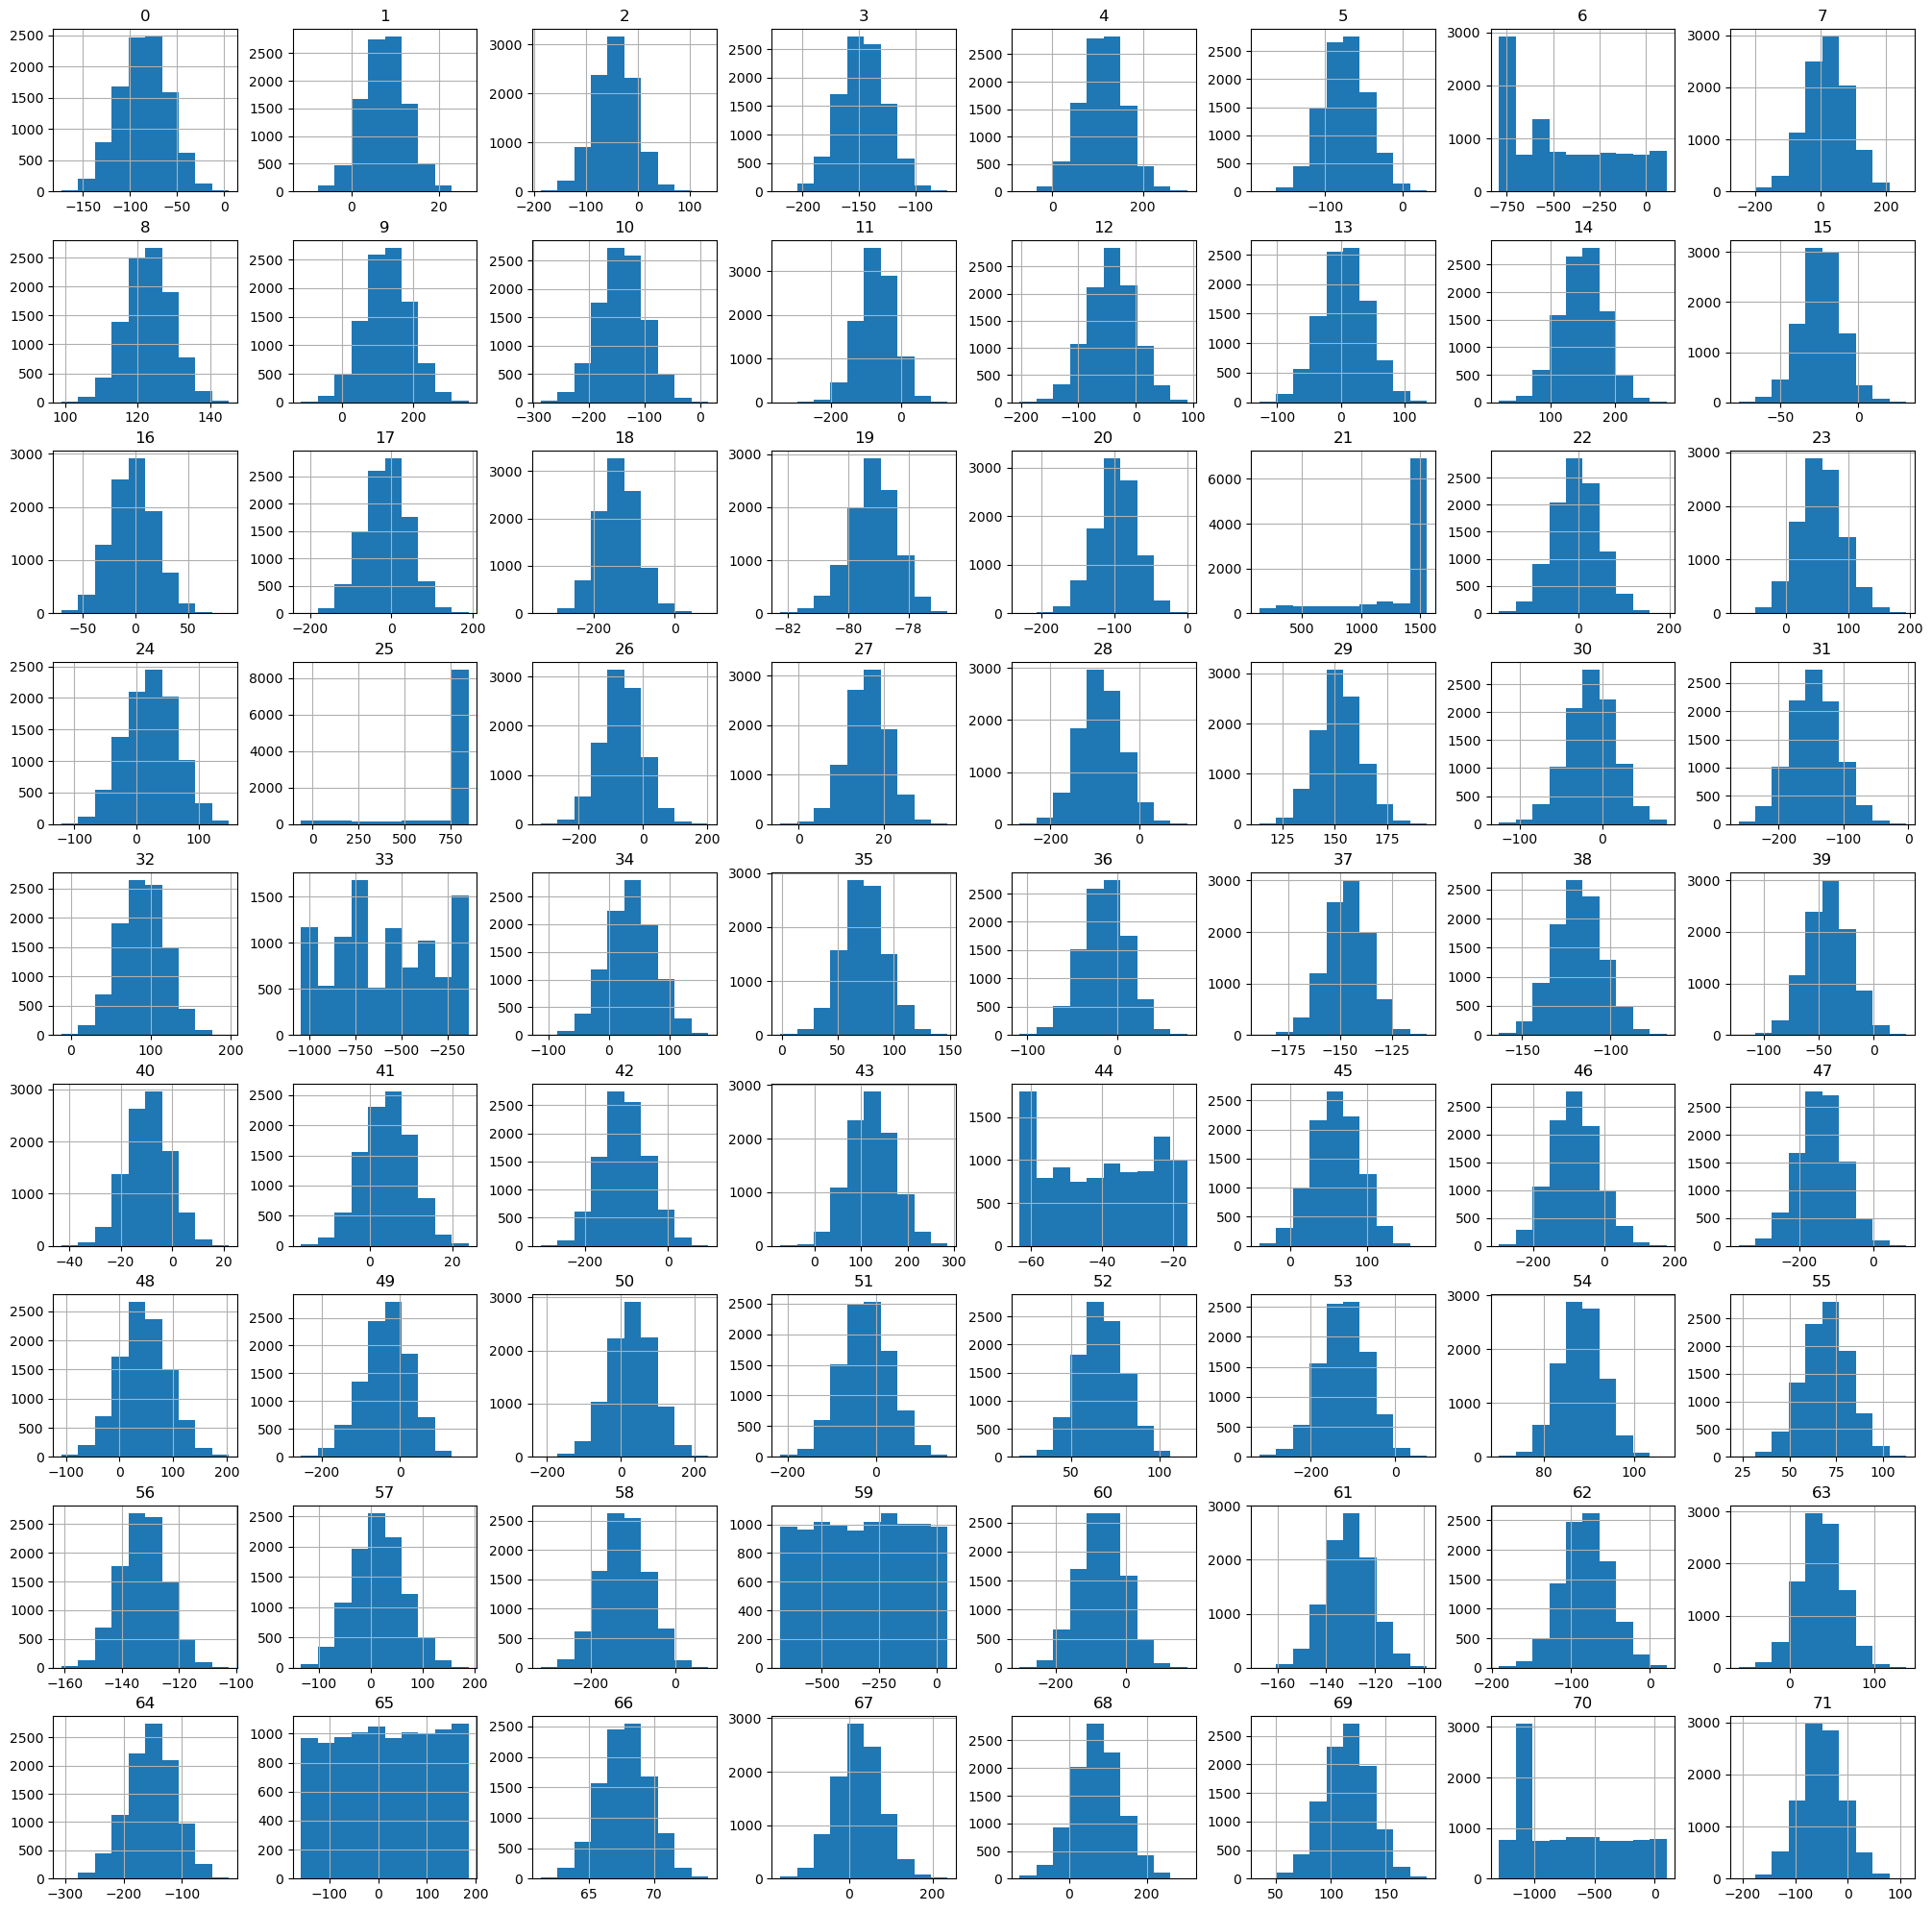

In [15]:
df_train.hist(figsize=(25, 25));

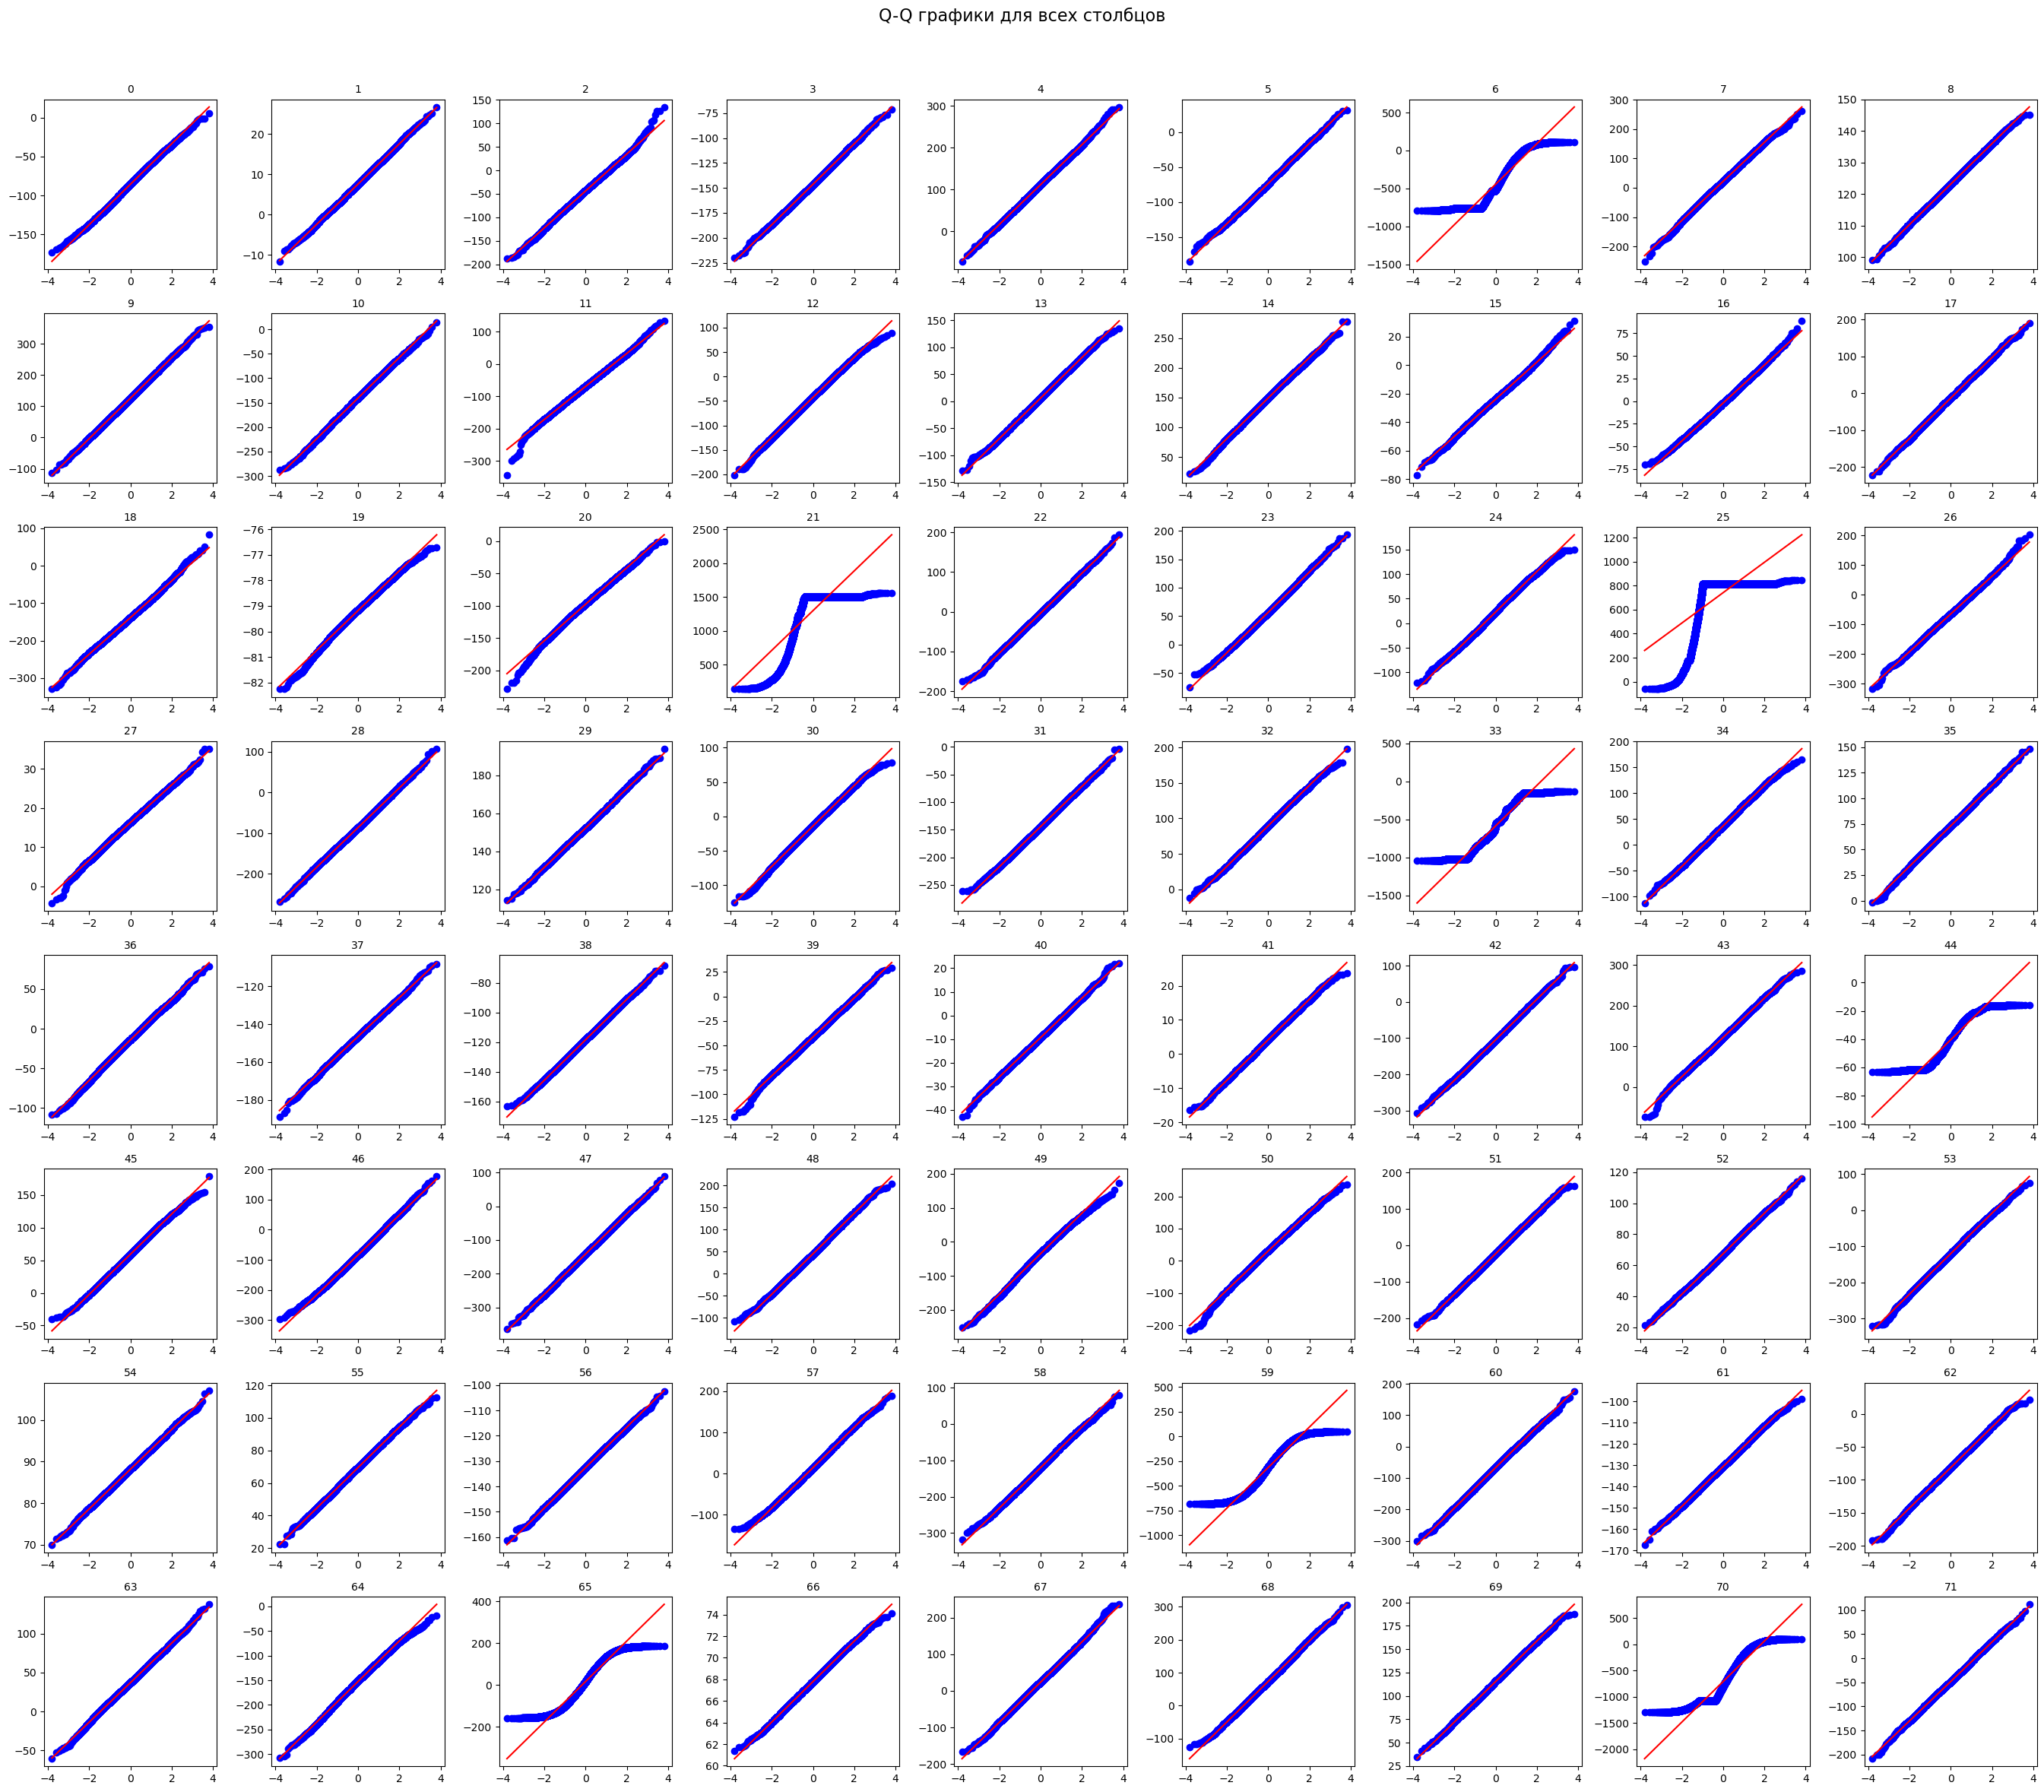

In [18]:
plot_qq_grids(df_train)

**Вывод**  
В результате анализа датасета с 73 колонками и 999 999 строками были получены следующие ключевые моменты:

- Дубликаты: Обнаружено  243 дубликатов. Рекомендуется провести их удаление для повышения качества анализа и моделирования.
- Пропуски: Пропуски отсутствуют, что позволяет использовать все доступные данные для дальнейшего анализа.
- Типы данных: Все значения числовые и успешно приведены к формату float32, что оптимизирует использование памяти. Есть не числовой столбец tsrget содержащий наш целевой признак
- Названия признаков: Признаки без имен, пронумерованные по порядку. Вероятно, данные закодированы, что следует учитывать при интерпретации результатов.
- Стандартизация: Разнообразие диапазонов значений признаков требует стандартизации для улучшения производительности моделей.
- Распределение значений: Большинство признаков имеют распределение, близкое к нормальному. Однако признаки с номерами 6, 21, 25, 33, 44, 59, 65 и 70 имеют отклонения. (как и в общей базе) Рекомендуется рассмотреть возможность их удаления, поскольку недостаток понимания их значимости может усложнить процесс моделирования.